## Generate predictions from models

### Import packages 

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
tfkl = tf.keras.layers
import pandas as pd
from scipy.stats import linregress

### Import functions

In [3]:
import evaluation_functions
import importlib
importlib.reload(evaluation_functions)

<module 'evaluation_functions' from '/Users/paigepark/Desktop/deep-mort/code/evaluation_functions.py'>

### Import data

In [ ]:
state_training = np.loadtxt('../data/state_training.txt')
state_test = np.loadtxt('../data/state_test.txt')

In [ ]:
country_training = np.loadtxt('../data/country_training.txt')
country_test = np.loadtxt('../data/country_test.txt')

In [ ]:
combined_training = np.loadtxt('../data/combined_training.txt')
combined_test = np.loadtxt('../data/combined_test.txt')\

In [7]:
geos_key = np.load('../data/geos_key.npy')
geo_dict = {int(code): geo for geo, code in geos_key}

In [ ]:
# convert actual test data to log scale
country_test[:,4][country_test[:,4] == 0] = 9e-06
country_test[:,4] = np.log(country_test[:,4])

In [ ]:
# convert actual test data to log scale
combined_test[:,4][combined_test[:,4] == 0] = 9e-06
combined_test[:,4] = np.log(combined_test[:,4])

### Import predictions

In [ ]:
# DL predictions - trained on all countries
dl_test_pred = []
for i in range(1,6):
    dl_test_pred.append(np.loadtxt(f"../data/country_test_predictions_{i}.txt"))

# LC predictions
lc_test_pred = []
for i in range(1,6):
    lc_test_pred_temp = np.loadtxt(f"../data/lc_forecast_all_{i}.csv", delimiter=",")
    lc_test_pred_temp = lc_test_pred_temp[np.lexsort((lc_test_pred_temp[:, 1], lc_test_pred_temp[:, 3], lc_test_pred_temp[:, 2], lc_test_pred_temp[:, 0]))]
    lc_test_pred_temp[:,4][lc_test_pred_temp[:,4] == 0] = 9e-06
    lc_test_pred_temp[:,4] = np.log(lc_test_pred_temp[:,4])
    lc_test_pred.append(lc_test_pred_temp)

# lee-miller predictions
lm_test_pred = []
for i in range(1,6):
    lm_test_pred_temp = np.loadtxt(f"../data/lm_forecast_all_{i}.csv", delimiter=",")
    lm_test_pred_temp = lm_test_pred_temp[np.lexsort((lm_test_pred_temp[:, 1], lm_test_pred_temp[:, 3], lm_test_pred_temp[:, 2], lm_test_pred_temp[:, 0]))]
    lm_test_pred_temp[:,4][lm_test_pred_temp[:,4] == 0] = 9e-06
    lm_test_pred_temp[:,4] = np.log(lm_test_pred_temp[:,4])
    lm_test_pred.append(lm_test_pred_temp)

# coherent predictions
c_test_pred = []
for i in range(1,6):
    c_test_pred_temp = np.loadtxt(f"../data/coherent_forecast_all_{i}.csv", delimiter=",")
    c_test_pred_temp = c_test_pred_temp[np.lexsort((c_test_pred_temp[:, 1], c_test_pred_temp[:, 3], c_test_pred_temp[:, 2], c_test_pred_temp[:, 0]))]
    c_test_pred_temp[:,4][c_test_pred_temp[:,4] == 0] = 9e-06
    c_test_pred_temp[:,4] = np.log(c_test_pred_temp[:,4])
    c_test_pred.append(c_test_pred_temp)

# DL predictions - trained on all countries and states
combined_test_pred = []
for i in range(1,6):
    combined_test_pred.append(np.loadtxt(f"../data/combined_test_predictions_{i}.txt"))

In [ ]:
# loading in single country / single gender mses rather than predictions (took too much memory to save predictions)
single_country_by_country_gender = []
for i in range(2):
    values = []
    with open(f'../data/single_country_mses_gender_{i}.txt', 'r') as file:
        for line in file:
            _, value = line.strip().split(':', 1)
            values.append(float(value.strip()))

    single_country_by_country_gender.append(np.array(values))

single_country_by_country_gender_ave = (single_country_by_country_gender[0] + single_country_by_country_gender[1]) / 2

[0.04520678 0.07076772 0.11304753 0.05694542 0.08180448 0.02581139
 0.12779621 0.06699962 0.15277155 0.04003039 0.68399984 0.18084831
 0.01225507 0.01399646 0.43147014 0.14180179 0.22171962 0.06974963
 0.14374023 2.4245435  0.1367043  0.02433088 0.0159106  0.2435254
 1.70067185 0.50094464 0.03862245 0.1745779  0.14872971 0.01823122
 0.06479193 0.08656655 0.09255376 1.4597376  0.09698224 0.06150722
 0.06517744 0.01089863]


### Prep data for MSE by age, year, sex plots

In [13]:
actual_data_divided = []
actual_combined_divided = []
dl_test_divided = [[] for _ in range(5)]
combined_test_divided = [[] for _ in range(5)]
lc_test_divided = [[] for _ in range(5)]
lm_test_divided = [[] for _ in range(5)]
c_test_divided = [[] for _ in range(5)]

for j in range(5):
    for i in range(88):
        actual_combined_divided.append(combined_test[combined_test[:,0] == i])
        combined_test_divided[j].append(combined_test_pred[j][combined_test_pred[j][:, 0] == i])

for j in range(5):
    for i in range(50,88):
        actual_data_divided.append(country_test[country_test[:, 0] == i])
        dl_test_divided[j].append(dl_test_pred[j][dl_test_pred[j][:, 0] == i])
        lc_test_divided[j].append(lc_test_pred[j][lc_test_pred[j][:, 0] == i])
        lm_test_divided[j].append(lm_test_pred[j][lm_test_pred[j][:, 0] == i])
        c_test_divided[j].append(c_test_pred[j][c_test_pred[j][:, 0] == i])


# Figures in Paper

### Overall performance (Figure 1)

In [ ]:
lc_all = []
lm_all = []
coh_all = []
dl_all = []

for j in range(5):
    lc_mse_results_by_country = []
    lm_mse_results_by_country = []
    coh_mse_results_by_country = []
    dl_mse_results_by_country = []
    for i in range(0,38):
        lc_mse_overall, lc_rmse_overall, lc_rrmse_overall = evaluation_functions.calculate_error(lc_test_divided[j][i], actual_data_divided[i])
        lm_mse_overall, lm_rmse_overall, lm_rrmse_overall = evaluation_functions.calculate_error(lm_test_divided[j][i], actual_data_divided[i])
        coh_mse_overall, coh_rmse_overall, coh_rrmse_overall = evaluation_functions.calculate_error(c_test_divided[j][i], actual_data_divided[i])
        dl_mse_overall, dl_rmse_overall, dl_rrmse_overall = evaluation_functions.calculate_error(dl_test_divided[j][i], actual_data_divided[i])
        
        lc_mse_results_by_country.append(lc_mse_overall)
        lm_mse_results_by_country.append(lm_mse_overall)
        coh_mse_results_by_country.append(coh_mse_overall)
        dl_mse_results_by_country.append(dl_mse_overall)

    lc_all.append(np.array(lc_mse_results_by_country))
    lm_all.append(np.array(lm_mse_results_by_country))
    coh_all.append(np.array(coh_mse_results_by_country))
    dl_all.append(np.array(dl_mse_results_by_country))

In [ ]:
# average mses by country
lc_ave_by_country = sum(lc_all) / len(lc_all)
lm_ave_by_country = sum(lm_all) / len(lm_all)
coh_ave_by_country = sum(coh_all) / len(coh_all)
dl_ave_by_country = sum(dl_all) / len(dl_all)

In [17]:
lc_overall = []
lm_overall = []
coh_overall = []
dl_overall = []

for i in range(5):    
    lc_mse_overall, lc_rmse_overall, lc_rrmse_overall = evaluation_functions.calculate_error(lc_test_pred[i], country_test)
    lm_mse_overall, lm_rmse_overall, lm_rrmse_overall = evaluation_functions.calculate_error(lm_test_pred[i], country_test)
    coh_mse_overall, coh_rmse_overall, coh_rrmse_overall = evaluation_functions.calculate_error(c_test_pred[i], country_test)
    dl_mse_overall, dl_rmse_overall, dl_rrmse_overall = evaluation_functions.calculate_error(dl_test_pred[i], country_test)

    lc_overall.append(lc_mse_overall)
    lm_overall.append(lm_mse_overall)
    coh_overall.append(coh_mse_overall)
    dl_overall.append(dl_mse_overall)

lc_overall_ave = sum(lc_overall) / len(lc_overall)
lm_overall_ave = sum(lm_overall) / len(lm_overall)
coh_overall_ave = sum(coh_overall) / len(coh_overall)
dl_overall_ave = sum(dl_overall) / len(dl_overall)

print(lc_overall_ave)
print(lm_overall_ave)
print(coh_overall_ave)
print(dl_overall_ave)

0.6309437327432361
0.4814339091034011
0.2563149554369398
0.17718931555547585


In [19]:
single_ctry_gender_overall_ave = np.mean(single_country_by_country_gender_ave)

In [ ]:
print(single_ctry_gender_overall_ave)

0.2643623682670295

Plot with no table

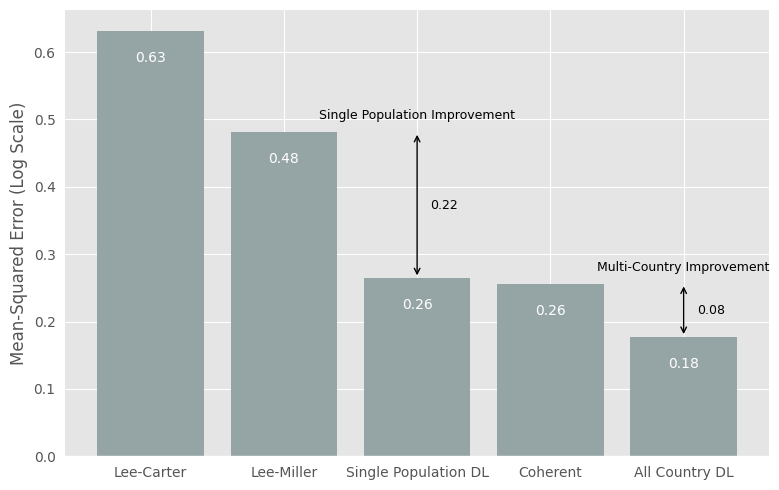

In [21]:
overalls = np.array([lc_overall_ave, lm_overall_ave, single_ctry_gender_overall_ave, coh_overall_ave, dl_overall_ave]) 
labels = ['Lee-Carter', 'Lee-Miller', 'Single Population DL', 'Coherent', 'All Country DL']

# Set style
plt.style.use('ggplot')

# Create the plot
fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(labels, overalls, color='#95A5A6')  # Soft blue-gray

# Remove spines and unnecessary ticks
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(left=False, bottom=False)

# Add value labels inside bars
for bar in bars:
    yval = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2,
        yval - 0.03,  # Position inside the bar
        f'{yval:.2f}',
        ha='center',
        va='top',
        fontsize=10,
        color='white' if yval > 0.15 else 'black'  # Adjust for contrast if needed
    )

# --- Add vertical arrows between relevant models ---
# Get bar heights
heights = overalls

# --- DL vs Lee-Miller (1-country models), arrow above Single Country DL ---
scdl_idx = 2  # Single Country DL bar
lm_idx = 1    # Lee-Miller bar
x = bars[scdl_idx].get_x() + bars[scdl_idx].get_width()/2  # move arrow to this bar

y_top = heights[lm_idx]
y_bottom = heights[scdl_idx]
delta_1 = y_top - y_bottom

ax.annotate(
    '',
    xy=(x, y_top),
    xytext=(x, y_bottom),
    arrowprops=dict(arrowstyle='<->', color='black', lw=1),
)
ax.text(x, y_top + 0.015, 'Single Population Improvement', ha='center', va='bottom', fontsize=9)
ax.text(x + 0.1, (y_top + y_bottom)/2, f'{delta_1:.2f}', ha='left', va='center', fontsize=9, color='black')

# --- DL vs Coherent (multi-country models), arrow above All Country DL ---
dl_idx = 4
coh_idx = 3
x = bars[dl_idx].get_x() + bars[dl_idx].get_width()/2  # move arrow to DL bar

y_top = heights[coh_idx]
y_bottom = heights[dl_idx]
delta_2 = y_top - y_bottom

ax.annotate(
    '',
    xy=(x, y_top),
    xytext=(x, y_bottom),
    arrowprops=dict(arrowstyle='<->', color='black', lw=1),
)
ax.text(x, y_top + 0.015, 'Multi-Country Improvement', ha='center', va='bottom', fontsize=9)
ax.text(x + 0.1, (y_top + y_bottom)/2, f'{delta_2:.2f}', ha='left', va='center', fontsize=9, color='black')



# Minimalist layout
ax.set_ylabel('Mean-Squared Error (Log Scale)')
ax.set_xlabel('')
plt.tight_layout()
plt.savefig("../results/overall_barplot.pdf", format="pdf")
plt.show()


Plot with table

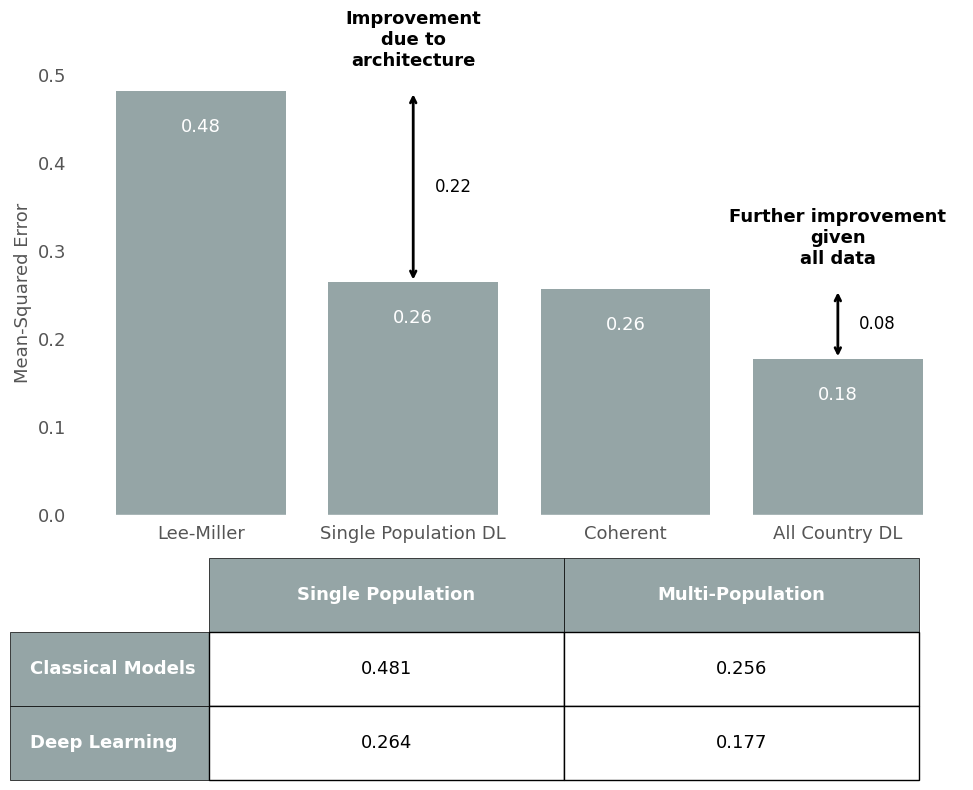

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Data (no Lee-Carter)
overalls = np.array([lm_overall_ave, single_ctry_gender_overall_ave, coh_overall_ave, dl_overall_ave])
labels = ['Lee-Miller', 'Single Population DL', 'Coherent', 'All Country DL']

# Table data
table_data = np.array([
    [lm_overall_ave, coh_overall_ave],
    [single_ctry_gender_overall_ave, dl_overall_ave]
])
table_rows = ['Classical Models', 'Deep Learning']
table_cols = ['Single Population', 'Multi-Population']

# Create vertical layout: table on top, bar plot below
fig = plt.figure(figsize=(10, 8))
fig.patch.set_facecolor('white')
gs = fig.add_gridspec(nrows=2, height_ratios=[2, 1])

# --- Top: Table ---
ax_table = fig.add_subplot(gs[1])
ax_table.axis('off')

# Create the table using bbox to force full-width
table = ax_table.table(
    cellText=[[f'{v:.3f}' for v in row] for row in table_data],
    rowLabels=table_rows,
    colLabels=table_cols,
    loc='upper center',
    cellLoc='center',
    bbox=[0.15, 0, 0.8, 1]  # full width
)

# Table style
table.auto_set_font_size(False)
table.set_fontsize(13)

for key, cell in table.get_celld().items():
    row, col = key

    # Style header cells
    if row == 0 or col == -1:
        cell.set_facecolor('#95A5A6')  # match barplot color
        cell.set_text_props(color='white', weight='bold', fontsize=13)
        cell.set_linewidth(0.5)
    else:
        cell.set_linewidth(1)  # remove inner borders
        cell.set_fontsize(13)

# --- Bottom: Bar Plot ---
ax = fig.add_subplot(gs[0])
bars = ax.bar(labels, overalls, color='#95A5A6')

# Clean axes
ax.set_facecolor('white')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(left=False, bottom=False, labelsize=13)

# Bar labels
for bar in bars:
    yval = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        yval - 0.03,
        f'{yval:.2f}',
        ha='center',
        va='top',
        fontsize=13,
        color='white' if yval > 0.15 else 'black'
    )

# Arrows (architecture)
scdl_idx, lm_idx = 1, 0
x = bars[scdl_idx].get_x() + bars[scdl_idx].get_width() / 2
y_top, y_bottom = overalls[lm_idx], overalls[scdl_idx]
delta_1 = y_top - y_bottom
ax.annotate('', xy=(x, y_top), xytext=(x, y_bottom),
            arrowprops=dict(arrowstyle='<->', color='black', lw=2))
ax.text(x, y_top + 0.025, 'Improvement\ndue to\narchitecture',
        ha='center', va='bottom', fontsize=13, fontweight='bold')
ax.text(x + 0.1, (y_top + y_bottom) / 2, f'{delta_1:.2f}', ha='left', va='center', fontsize=12)

# Arrows (data)
dl_idx, coh_idx = 3, 2
x = bars[dl_idx].get_x() + bars[dl_idx].get_width() / 2
y_top, y_bottom = overalls[coh_idx], overalls[dl_idx]
delta_2 = y_top - y_bottom
ax.annotate('', xy=(x, y_top), xytext=(x, y_bottom),
            arrowprops=dict(arrowstyle='<->', color='black', lw=2))
ax.text(x, y_top + 0.025, 'Further improvement\ngiven\nall data',
        ha='center', va='bottom', fontsize=13, fontweight='bold')
ax.text(x + 0.1, (y_top + y_bottom) / 2, f'{delta_2:.2f}', ha='left', va='center', fontsize=12)

# Final labels
ax.set_ylabel('Mean-Squared Error', fontsize=13)
ax.set_xlabel('')

plt.tight_layout()
plt.savefig("../results/overall_barplot_with_table.pdf", format="pdf")
plt.show()


### Results by country (Table 1)

In [140]:
mse_results_by_country = np.column_stack((lc_ave_by_country, lm_ave_by_country, coh_ave_by_country, single_country_by_country_gender_ave, dl_ave_by_country))

In [141]:
new_mses = np.row_stack([mse_results_by_country, overalls])

In [142]:
# add a row to geos_key for overall mses
geos_key
new = np.array([["Overall", 88]])
geos_key_new = np.vstack([geos_key, new])

In [ ]:
# change geo abbreviations to full name for table
full_names_mapping = {
    # US states
    'AK': 'Alaska', 'AL': 'Alabama', 'AZ': 'Arizona', 'AR': 'Arkansas',
    'CA': 'California', 'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware',
    'FL': 'Florida', 'GA': 'Georgia', 'HI': 'Hawaii', 'IA': 'Iowa', 'ID': 'Idaho',
    'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas', 'KY': 'Kentucky',
    'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland', 'MA': 'Massachusetts',
    'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri',
    'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire',
    'NJ': 'New Jersey', 'NM': 'New Mexico', 'NY': 'New York', 'NC': 'North Carolina',
    'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma', 'OR': 'Oregon',
    'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina', 'SD': 'South Dakota',
    'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont',
    'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming',

    # Countries
    'AUS': 'Australia', 'AUT': 'Austria', 'BEL': 'Belgium', 'BGR': 'Bulgaria', 'BLR': 'Belarus',
    'CAN': 'Canada', 'CHE': 'Switzerland', 'CZE': 'Czech Republic', 'DNK': 'Denmark',
    'ESP': 'Spain', 'EST': 'Estonia', 'FIN': 'Finland', 'FRATNP': 'France',
    'GBRTENW': 'England and Wales', 'GBR_NIR': 'Northern Ireland',
    'GBR_SCO': 'Scotland', 'GRC': 'Greece', 'HUN': 'Hungary', 'IRL': 'Ireland',
    'ISL': 'Iceland', 'ISR': 'Israel', 'ITA': 'Italy', 'JPN': 'Japan', 'LTU': 'Lithuania',
    'LUX': 'Luxembourg', 'LVA': 'Latvia', 'NLD': 'Netherlands', 'NOR': 'Norway',
    'NZL_NM': 'New Zealand', 'POL': 'Poland', 'PRT': 'Portugal', 'RUS': 'Russia',
    'SVK': 'Slovakia', 'SVN': 'Slovenia', 'SWE': 'Sweden', 'TWN': 'Taiwan',
    'UKR': 'Ukraine', 'USA': 'United States', 'NZL_NM': 'New Zealand',
    'Overall': 'Overall'
}

# Convert existing array
geos_key_full_names = np.array([
    [full_names_mapping.get(code, code), idx] for code, idx in geos_key_new
])

In [ ]:
percent_improvement_single = []
for i in range(0,38):
    val = (1 - mse_results_by_country[i][3] / mse_results_by_country[i][1])
    percent_improvement_single.append(val)

percent_improvement_all_countries = []
for i in range(0,39):
    val = (1 - new_mses[i][4] / new_mses[i][2]) * 100
    percent_improvement_all_countries.append(val)


In [149]:
mses_with_percent_imp = np.column_stack((new_mses, percent_improvement_all_countries))

In [ ]:
# create a DataFrame
df_mse = pd.DataFrame(
    mses_with_percent_imp,
    columns=['LC', 'LM', 'Coherent', 'DL Single', 'DL All', "\% Impr. DL vs Coherent"],
    index=[geos_key_full_names[i+50, 0] for i in range(len(new_mses))]
)
# round
df_mse = df_mse.round(2)


# sort by the last column in descending order
df_data = df_mse.iloc[:-1]
df_overall = df_mse.iloc[-1:]
df_data_sorted = df_data.sort_values(by="\% Impr. DL vs Coherent", ascending=False)

# concatenate the sorted data with the overall row at the end
df_final = pd.concat([df_data_sorted, df_overall])

# convert the DataFrame to a LaTeX formatted table
latex_table = df_final.to_latex(index=True, float_format="%.2f")

# display the LaTeX code
print(latex_table)

\begin{tabular}{lrrrrrr}
\toprule
 & LC & LM & Coherent & DL Single & DL All & \% Impr. DL vs Coherent \\
\midrule
Taiwan & 0.37 & 0.52 & 0.25 & 0.06 & 0.04 & 84.38 \\
Luxembourg & 7.82 & 6.57 & 3.25 & 1.70 & 1.27 & 60.91 \\
Israel & 0.45 & 0.47 & 0.13 & 0.14 & 0.06 & 56.29 \\
Belarus & 0.14 & 0.13 & 0.08 & 0.08 & 0.05 & 34.62 \\
Ukraine & 0.07 & 0.07 & 0.04 & 0.07 & 0.02 & 32.67 \\
Finland & 0.30 & 0.20 & 0.15 & 0.18 & 0.11 & 27.83 \\
Hungary & 0.30 & 0.11 & 0.08 & 0.07 & 0.06 & 27.22 \\
Austria & 0.09 & 0.10 & 0.09 & 0.07 & 0.07 & 23.32 \\
Slovenia & 1.42 & 1.42 & 0.59 & 1.46 & 0.45 & 22.98 \\
Czech Republic & 0.07 & 0.09 & 0.07 & 0.07 & 0.06 & 22.11 \\
Ireland & 0.20 & 0.20 & 0.16 & 0.14 & 0.12 & 22.11 \\
Switzerland & 0.16 & 0.14 & 0.13 & 0.13 & 0.10 & 21.37 \\
Denmark & 0.21 & 0.19 & 0.17 & 0.15 & 0.14 & 19.82 \\
Belgium & 0.08 & 0.08 & 0.06 & 0.11 & 0.05 & 19.79 \\
Australia & 0.04 & 0.04 & 0.03 & 0.05 & 0.03 & 18.26 \\
Norway & 0.17 & 0.19 & 0.15 & 0.17 & 0.12 & 16.44 \\
France 

### Top performers (Figure 3)

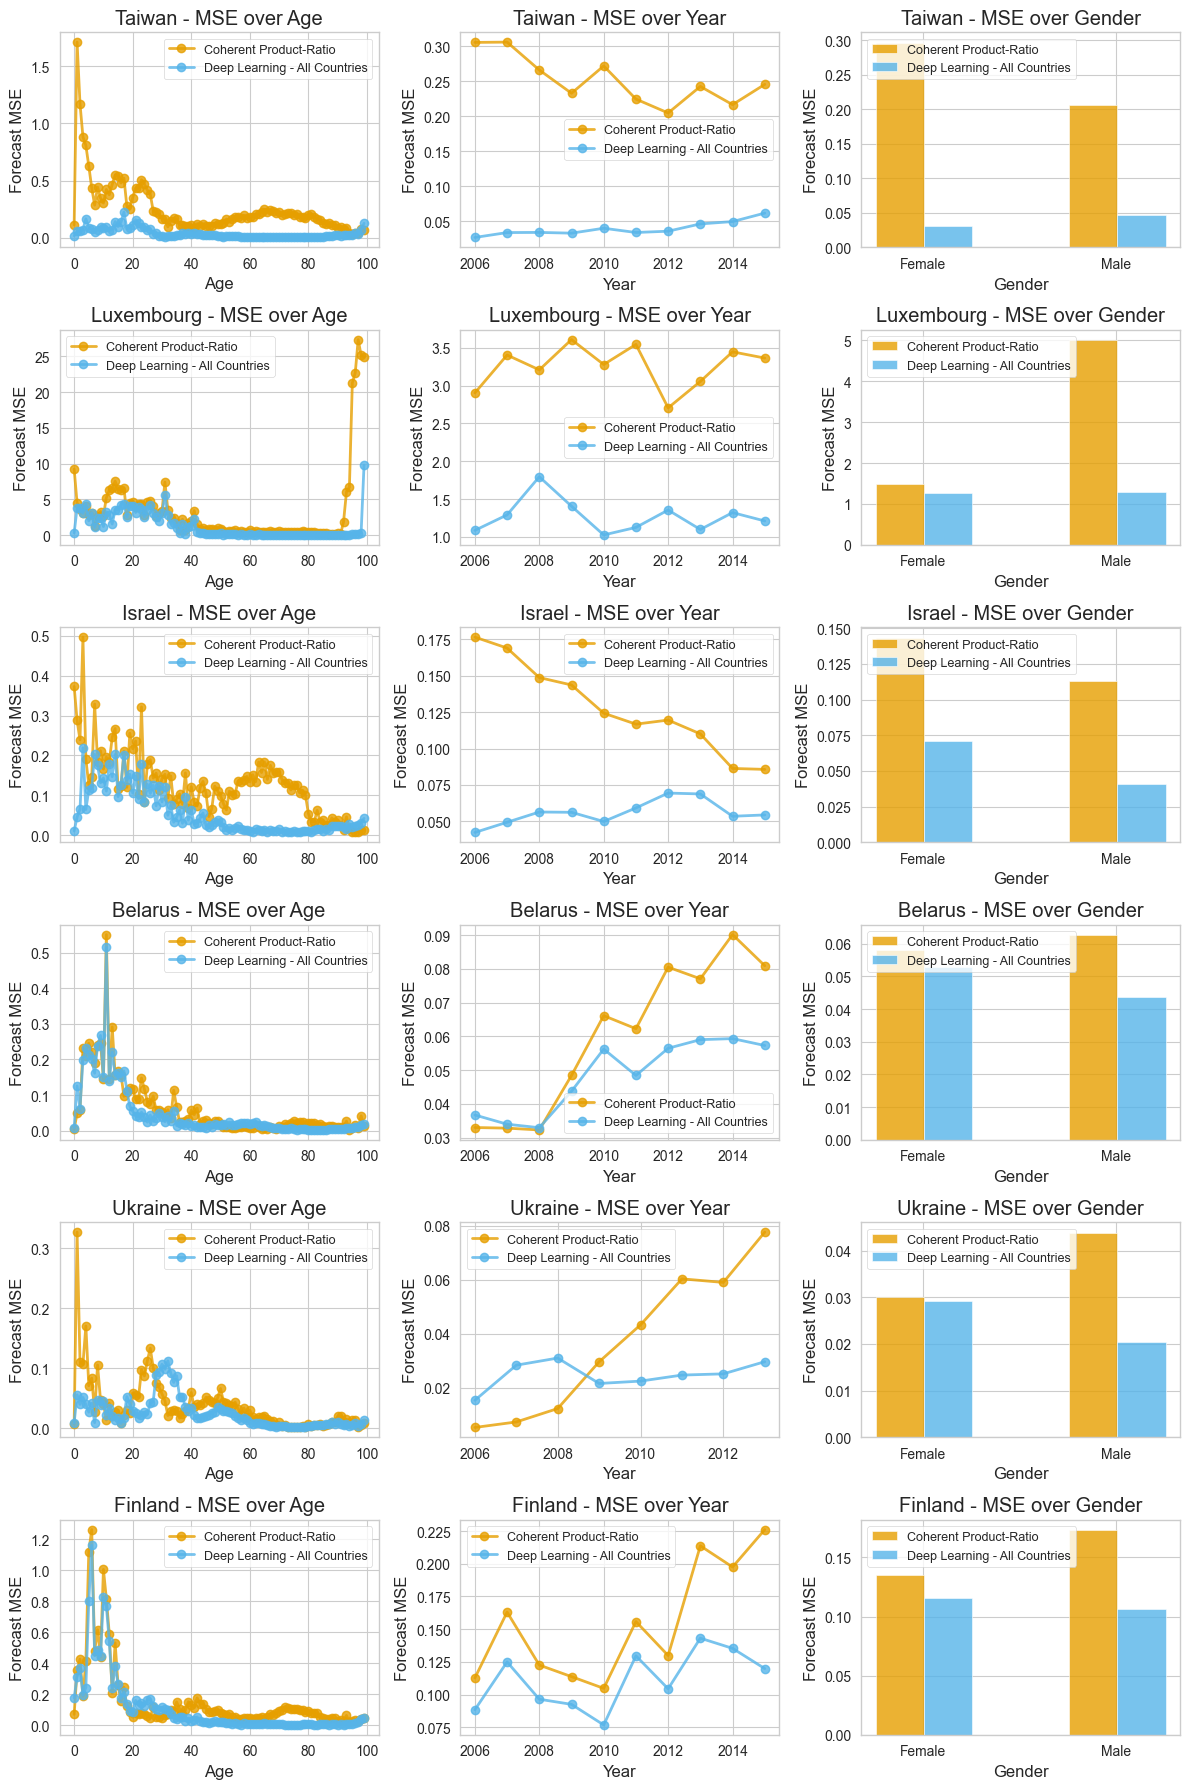

In [ ]:
# Simple top performer / US figures 
sns.set_style("whitegrid")
palette = ["#E69F00", "#56B4E9", "#009E73"]  # orange, sky blue, green

def compute_avg_mses(country_index, feature_index):
    model_data = {
        "Coherent Product-Ratio": c_test_divided,
        "Deep Learning - All Countries": dl_test_divided
    }
    avg_mses = {}

    for label, test_data in model_data.items():
        mse_list = []
        for i in range(5):
            mse, _, _ = evaluation_functions.calculate_error_by_category(
                test_data[i][country_index],
                actual_data_divided[country_index],
                feature_index=feature_index
            )
            mse_list.append(mse)

        combined = {}
        for d in mse_list:
            for k, v in d.items():
                if k not in combined:
                    combined[k] = [v, 1]
                else:
                    combined[k][0] += v
                    combined[k][1] += 1
        avg_mses[label] = {k: total / count for k, (total, count) in combined.items()}

    return avg_mses

countries = {"Taiwan": 35, "Luxembourg": 24, "Israel": 20, "Belarus": 2, "Ukraine": 36, "Finland": 11}
features = {"Age": 3, "Year": 2, "Gender": 1}  # Note: "Gender" has feature_index = 1

fig, axes = plt.subplots(6, 3, figsize=(12, 18), sharey=False)
axes = axes.flatten()

for idx, (country_name, country_index) in enumerate(countries.items()):
    for jdx, (feature_name, feature_index) in enumerate(features.items()):
        avg_mses = compute_avg_mses(country_index, feature_index)
        ax = axes[idx * len(features) + jdx]  # Corrected indexing

        for i, (label, data) in enumerate(avg_mses.items()):
            keys, values = zip(*sorted(data.items()))

            if feature_index == 1:  # Gender (categorical)
                x = np.arange(len(keys)) + i * 0.25  # offset bars
                ax.bar(x, values, width=0.25, label=label, alpha=0.8, color=palette[i])
                gender_labels = ['Female' if k == 0 else 'Male' for k in keys]
                ax.set_xticks(np.arange(len(keys)) + 0.12)
                ax.set_xticklabels(gender_labels)
                ax.legend(fontsize=9, loc='upper left')
            else:
                ax.plot(keys, values, label=label, linestyle='-', marker='o',
                        linewidth=2, alpha=0.8, color=palette[i])
                ax.legend(fontsize=9, loc='best')

        ax.set_title(f"{country_name} - MSE over {feature_name}")
        ax.set_xlabel(feature_name)
        ax.set_ylabel("Forecast MSE")
        

plt.tight_layout()
plt.savefig("../results/top_6x3.pdf", format="pdf", bbox_inches="tight")
plt.show()

# US (Figure 4)

In [ ]:
# Set country index to 50 - geos_key
country_index = 37

In [ ]:
# coherent average mses
c_mse_list = []
c_rmse_list = []
c_rrmse_list = []

for i in range(5):
    c_mse, c_rmse, c_rrmse = evaluation_functions.calculate_error_by_category(c_test_divided[i][country_index], actual_data_divided[country_index], feature_index=3) # 3 is age 
    c_mse_list.append(c_mse)
    c_rmse_list.append(c_rmse)
    c_rrmse_list.append(c_rrmse)

combined = {}

for d in c_mse_list:
    for k, v in d.items():
        if k not in combined:
            combined[k] = [v, 1]  # [sum, count]
        else:
            combined[k][0] += v
            combined[k][1] += 1

c_ave_mses_age = {k: total / count for k, (total, count) in combined.items()}

In [ ]:
dl_mse_list = []
dl_rmse_list = []
dl_rrmse_list = []

for i in range(5):
    dl_mse, dl_rmse, dl_rrmse = evaluation_functions.calculate_error_by_category(dl_test_divided[i][country_index], actual_data_divided[country_index], feature_index=3) 
    dl_mse_list.append(dl_mse)
    dl_rmse_list.append(dl_rmse)
    dl_rrmse_list.append(dl_rrmse)

combined = {}

for d in dl_mse_list:
    for k, v in d.items():
        if k not in combined:
            combined[k] = [v, 1]  # [sum, count]
        else:
            combined[k][0] += v
            combined[k][1] += 1

dl_ave_mses_age = {k: total / count for k, (total, count) in combined.items()}

In [ ]:
combined_index = 87
combined_mse_list = []
combined_rmse_list = []
combined_rrmse_list = []

for i in range(5):
    combined_mse, combined_rmse, combined_rrmse = evaluation_functions.calculate_error_by_category(combined_test_divided[i][combined_index], actual_combined_divided[combined_index], feature_index=3) 
    combined_mse_list.append(combined_mse)
    combined_rmse_list.append(combined_rmse)
    combined_rrmse_list.append(combined_rrmse)

combined = {}

for d in combined_mse_list:
    for k, v in d.items():
        if k not in combined:
            combined[k] = [v, 1]  # [sum, count]
        else:
            combined[k][0] += v
            combined[k][1] += 1

combined_ave_mses_age = {k: total / count for k, (total, count) in combined.items()}

Getting results by year 

In [ ]:
# coherent average mses
c_mse_list = []
c_rmse_list = []
c_rrmse_list = []

for i in range(5):
    c_mse, c_rmse, c_rrmse = evaluation_functions.calculate_error_by_category(c_test_divided[i][country_index], actual_data_divided[country_index], feature_index=2) 
    c_mse_list.append(c_mse)
    c_rmse_list.append(c_rmse)
    c_rrmse_list.append(c_rrmse)

combined = {}

for d in c_mse_list:
    for k, v in d.items():
        if k not in combined:
            combined[k] = [v, 1]  # [sum, count]
        else:
            combined[k][0] += v
            combined[k][1] += 1

c_ave_mses_year = {k: total / count for k, (total, count) in combined.items()}

In [ ]:
dl_mse_list = []
dl_rmse_list = []
dl_rrmse_list = []

for i in range(5):
    dl_mse, dl_rmse, dl_rrmse = evaluation_functions.calculate_error_by_category(dl_test_divided[i][country_index], actual_data_divided[country_index], feature_index=2) 
    dl_mse_list.append(dl_mse)
    dl_rmse_list.append(dl_rmse)
    dl_rrmse_list.append(dl_rrmse)

combined = {}

for d in dl_mse_list:
    for k, v in d.items():
        if k not in combined:
            combined[k] = [v, 1]  # [sum, count]
        else:
            combined[k][0] += v
            combined[k][1] += 1

dl_ave_mses_year = {k: total / count for k, (total, count) in combined.items()}

In [ ]:
combined_index = 87
combined_mse_list = []
combined_rmse_list = []
combined_rrmse_list = []

for i in range(5):
    combined_mse, combined_rmse, combined_rrmse = evaluation_functions.calculate_error_by_category(combined_test_divided[i][combined_index], actual_combined_divided[combined_index], feature_index=2) 
    combined_mse_list.append(combined_mse)
    combined_rmse_list.append(combined_rmse)
    combined_rrmse_list.append(combined_rrmse)

combined = {}

for d in combined_mse_list:
    for k, v in d.items():
        if k not in combined:
            combined[k] = [v, 1]  # [sum, count]
        else:
            combined[k][0] += v
            combined[k][1] += 1

combined_ave_mses_year = {k: total / count for k, (total, count) in combined.items()}

Getting results by gender

In [129]:
# coherent average mses
c_mse_list = []
c_rmse_list = []
c_rrmse_list = []

for i in range(5):
    c_mse, c_rmse, c_rrmse = evaluation_functions.calculate_error_by_category(c_test_divided[i][country_index], actual_data_divided[country_index], feature_index=1) 
    c_mse_list.append(c_mse)
    c_rmse_list.append(c_rmse)
    c_rrmse_list.append(c_rrmse)

combined = {}

for d in c_mse_list:
    for k, v in d.items():
        if k not in combined:
            combined[k] = [v, 1]  # [sum, count]
        else:
            combined[k][0] += v
            combined[k][1] += 1

c_ave_mses_gender = {k: total / count for k, (total, count) in combined.items()}

In [131]:
dl_mse_list = []
dl_rmse_list = []
dl_rrmse_list = []

for i in range(5):
    dl_mse, dl_rmse, dl_rrmse = evaluation_functions.calculate_error_by_category(dl_test_divided[i][country_index], actual_data_divided[country_index], feature_index=1) 
    dl_mse_list.append(dl_mse)
    dl_rmse_list.append(dl_rmse)
    dl_rrmse_list.append(dl_rrmse)

combined = {}

for d in dl_mse_list:
    for k, v in d.items():
        if k not in combined:
            combined[k] = [v, 1]  # [sum, count]
        else:
            combined[k][0] += v
            combined[k][1] += 1

dl_ave_mses_gender = {k: total / count for k, (total, count) in combined.items()}

In [132]:
combined_index = 87
combined_mse_list = []
combined_rmse_list = []
combined_rrmse_list = []

for i in range(5):
    combined_mse, combined_rmse, combined_rrmse = evaluation_functions.calculate_error_by_category(combined_test_divided[i][combined_index], actual_combined_divided[combined_index], feature_index=1) 
    combined_mse_list.append(combined_mse)
    combined_rmse_list.append(combined_rmse)
    combined_rrmse_list.append(combined_rrmse)

combined = {}

for d in combined_mse_list:
    for k, v in d.items():
        if k not in combined:
            combined[k] = [v, 1]  # [sum, count]
        else:
            combined[k][0] += v
            combined[k][1] += 1

combined_ave_mses_gender = {k: total / count for k, (total, count) in combined.items()}

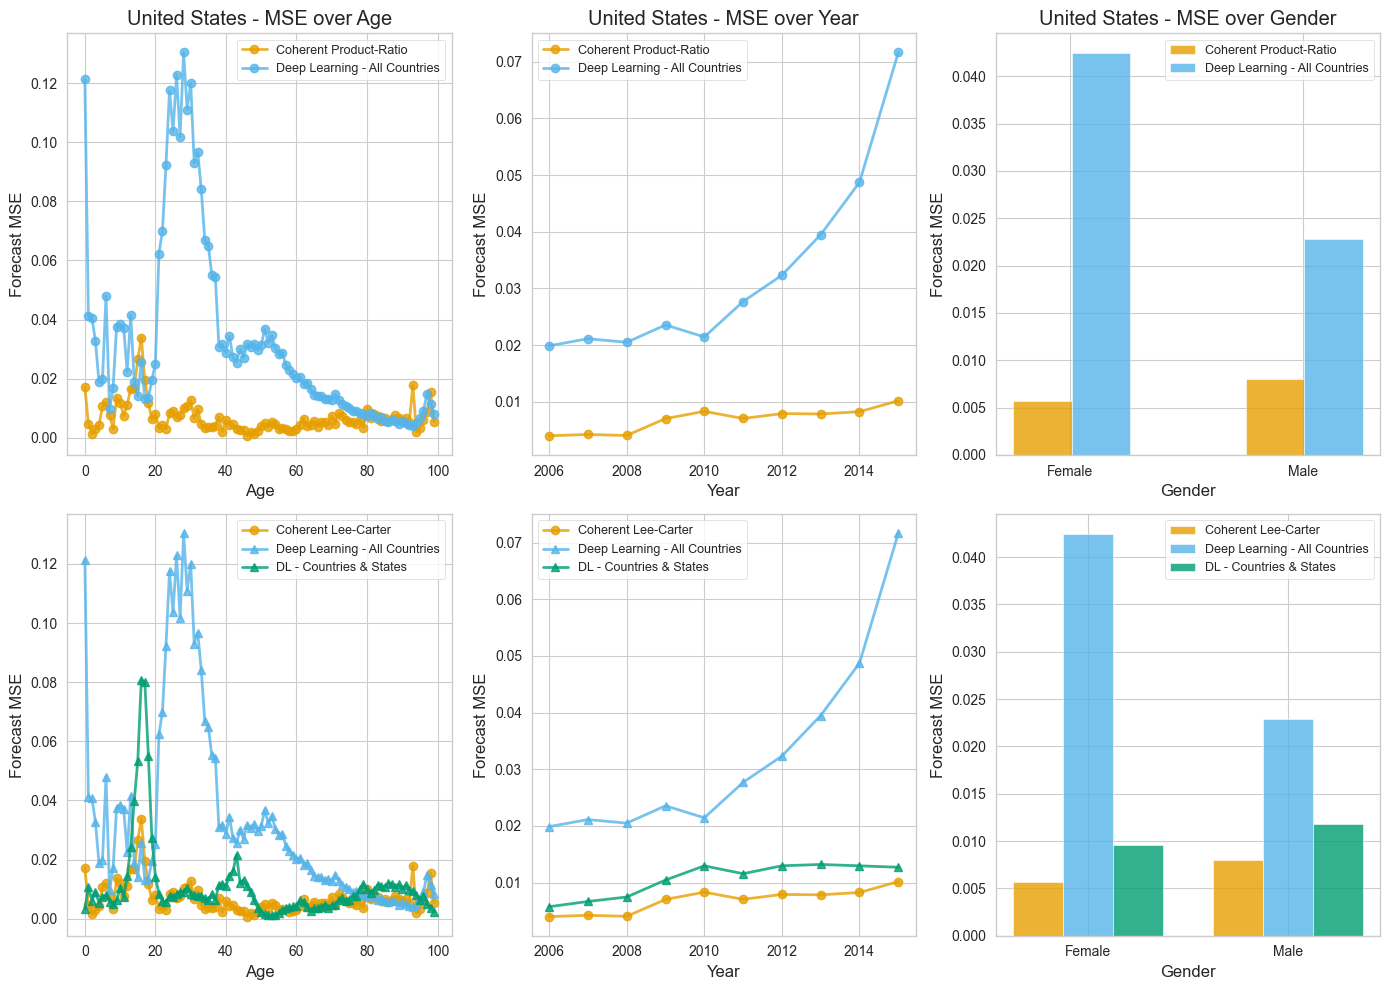

In [138]:
sns.set_style("whitegrid")
palette = ["#E69F00", "#56B4E9", "#009E73"]

# Prepare the sorted data
# For Age
keys1_age, values1_age = zip(*sorted(c_ave_mses_age.items()))
keys2_age, values2_age = zip(*sorted(dl_ave_mses_age.items()))
keys3_age, values3_age = zip(*sorted(combined_ave_mses_age.items()))

# For Year
keys1_year, values1_year = zip(*sorted(c_ave_mses_year.items()))
keys2_year, values2_year = zip(*sorted(dl_ave_mses_year.items()))
keys3_year, values3_year = zip(*sorted(combined_ave_mses_year.items()))

# For Year
keys1_gender, values1_gender = zip(*sorted(c_ave_mses_gender.items()))
keys2_gender, values2_gender = zip(*sorted(dl_ave_mses_gender.items()))
keys3_gender, values3_gender = zip(*sorted(combined_ave_mses_gender.items()))

fig, axes = plt.subplots(2, 3, figsize=(14, 10))  # 2 rows, 3 columns
axes = axes.flatten()

# --- Top row: Individual country results (e.g., United States) ---
countries = {"United States": 37}
features = {"Age": 3, "Year": 2, "Gender": 1}

for idx, (country_name, country_index) in enumerate(countries.items()):
    for jdx, (feature_name, feature_index) in enumerate(features.items()):
        avg_mses = compute_avg_mses(country_index, feature_index)
        ax = axes[idx * len(features) + jdx]  # Corrected indexing

        for i, (label, data) in enumerate(avg_mses.items()):
            keys, values = zip(*sorted(data.items()))

            if feature_index == 1:  # Gender (categorical)
                x = np.arange(len(keys)) + i * 0.25  # offset bars
                ax.bar(x, values, width=0.25, label=label, alpha=0.8, color=palette[i])
                gender_labels = ['Female' if k == 0 else 'Male' for k in keys]
                ax.set_xticks(np.arange(len(keys)) + 0.12)
                ax.set_xticklabels(gender_labels)
                ax.legend(fontsize=9, loc='upper right')
            else:
                ax.plot(keys, values, label=label, linestyle='-', marker='o',
                        linewidth=2, alpha=0.8, color=palette[i])
                ax.legend(fontsize=9, loc='best')

        ax.set_title(f"{country_name} - MSE over {feature_name}")
        ax.set_xlabel(feature_name)
        ax.set_ylabel("Forecast MSE")

# --- Bottom row: Combined model comparisons ---
# Age
axes[3].plot(keys1_age, values1_age, label="Coherent Lee-Carter", color=palette[0], linestyle='-', marker='o', linewidth=2, alpha=0.8)
axes[3].plot(keys2_age, values2_age, label="Deep Learning - All Countries", color=palette[1], linestyle='-', marker='^', linewidth=2, alpha=0.8)
axes[3].plot(keys3_age, values3_age, label="DL - Countries & States", color=palette[2], linestyle='-', marker='^', linewidth=2, alpha=0.8)
axes[3].set_xlabel("Age")
axes[3].set_ylabel("Forecast MSE")
axes[3].legend(fontsize=9)

# Year
axes[4].plot(keys1_year, values1_year, label="Coherent Lee-Carter", color=palette[0], linestyle='-', marker='o', linewidth=2, alpha=0.8)
axes[4].plot(keys2_year, values2_year, label="Deep Learning - All Countries", color=palette[1], linestyle='-', marker='^', linewidth=2, alpha=0.8)
axes[4].plot(keys3_year, values3_year, label="DL - Countries & States", color=palette[2], linestyle='-', marker='^', linewidth=2, alpha=0.8)
axes[4].set_xlabel("Year")
axes[4].set_ylabel("Forecast MSE")
axes[4].legend(fontsize=9)

# Gender
ax = axes[5]
keys = list(keys1_gender)  # should be [0, 1]
x = np.arange(len(keys))

bar_width = 0.25

# Offset each set of bars
ax.bar(x - bar_width, values1_gender, width=bar_width, label="Coherent Lee-Carter", color=palette[0], alpha=0.8)
ax.bar(x, values2_gender, width=bar_width, label="Deep Learning - All Countries", color=palette[1], alpha=0.8)
ax.bar(x + bar_width, values3_gender, width=bar_width, label="DL - Countries & States", color=palette[2], alpha=0.8)

# Labeling
gender_labels = ['Female' if k == 0 else 'Male' for k in keys]
ax.set_xticks(x)
ax.set_xticklabels(gender_labels)

ax.set_xlabel("Gender")
ax.set_ylabel("Forecast MSE")
ax.legend(fontsize=9)

plt.tight_layout()
plt.savefig("../results/combined_us_3x3.pdf", format="pdf", bbox_inches="tight")
plt.show()


# Supplement figures

Log simulation

In [3]:
# Define true mortality rates
young_rate = 0.0004
middle_rate = 0.004
old_rate = 0.2

rates = np.array([young_rate, middle_rate, old_rate])
age_labels = ['Young', 'Middle-aged', 'Old']

# Convert to log scale
log_rates = np.log(rates)

# Simulate model prediction with fixed error in log space
log_error_value = 0.2
log_preds = log_rates + log_error_value

# Convert predictions back to original scale
predicted_rates = np.exp(log_preds)

# Compute log error and absolute error
log_errors = log_preds - log_rates
abs_errors = np.abs(predicted_rates - rates)

# Create DataFrame
df = pd.DataFrame({
    'Age Group': age_labels,
    'True Rate': rates,
    'Predicted Rate': predicted_rates,
    'Log Error': log_errors,
    'Absolute Error': abs_errors
})

# Round for nicer table formatting
df_rounded = df.copy()
df_rounded[['True Rate', 'Predicted Rate', 'Log Error', 'Absolute Error']] = df_rounded[
    ['True Rate', 'Predicted Rate', 'Log Error', 'Absolute Error']
].round(6)

# Output LaTeX code
latex_table = df_rounded.to_latex(index=False, caption="Errors from log-scale mortality prediction.", label="tab:log_error_example")
print(latex_table)


\begin{table}
\caption{Errors from log-scale mortality prediction.}
\label{tab:log_error_example}
\begin{tabular}{lrrrr}
\toprule
Age Group & True Rate & Predicted Rate & Log Error & Absolute Error \\
\midrule
Young & 0.000400 & 0.000489 & 0.200000 & 0.000089 \\
Middle-aged & 0.004000 & 0.004886 & 0.200000 & 0.000886 \\
Old & 0.200000 & 0.244281 & 0.200000 & 0.044281 \\
\bottomrule
\end{tabular}
\end{table}



Population plots

In [ ]:
# read in population data from world bank
population_data_full = pd.read_csv('../data/pop-data.csv', delimiter=',', skiprows=4)

In [ ]:
valid_codes_full = set(full_names_mapping.values())
valid_codes_abr = set(geo_dict.values())

In [ ]:
valid_codes_full.discard('Georgia')
valid_codes_abr.discard('GEO')

In [ ]:
population_data_rows = population_data_full[population_data_full['Country Name'].isin(valid_codes_full) | (population_data_full['Country Code'].isin(valid_codes_abr))]

In [ ]:
# get pop data for 1987, midpoint of time series
pop_data_1987 = population_data_rows[['Country Code', '1987']]


In [ ]:
# manually add data for UK countries and Taiwan as they are not included in WB data
# from Office for National Statistics (https://www.ons.gov.uk/peoplepopulationandcommunity/populationandmigration/populationestimates)
# E & W 1987 pop
# 50123000
ew = np.array(['GBRTENW', 50123000])


# Scot 1987 pop
# 5099000
scot = np.array(['GBR_SCO', 5099000])

# NIR 1987 pop
# 1582000
nir = np.array(['GBR_NIR', 1582000])

# from Wikepedia, which cites (https://eng.stat.gov.tw/default.aspx) 
# Taiwan 1987 pop
# 19564000
twn = np.array(['TWN', 19564000])

additional_countries = np.row_stack([ew, scot, nir, twn])

In [ ]:
additional_countries = pd.DataFrame(additional_countries, columns=['Country Code', '1987'])

In [ ]:
pop_data_1987_all = pd.concat([pop_data_1987, additional_countries], ignore_index=True)

In [ ]:
pop_data_1987_all = pop_data_1987_all.sort_values(by = 'Country Code', ignore_index=True)

In [ ]:
percent_improvement_all_countries_no_overall = percent_improvement_all_countries[:-1]

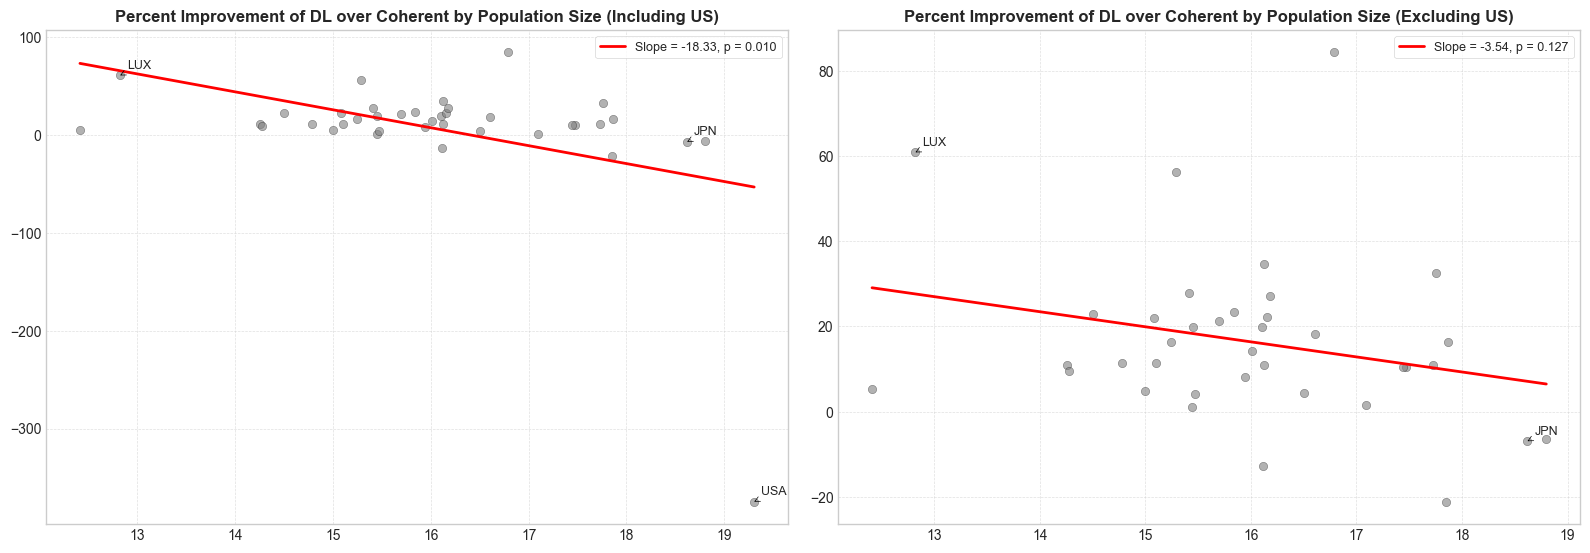

In [ ]:

plt.style.use("seaborn-v0_8-whitegrid")

fig, axs = plt.subplots(1, 2, figsize=(16,6))
axs_top = axs[0]
axs_bottom = axs[1]

titles = [
    "Percent Improvement of DL over Coherent by Population Size (Including US)",
    "Percent Improvement of DL over Coherent by Population Size (Excluding US)"
]

improvements = [
    ("coh", percent_improvement_all_countries_no_overall, False),
    ("coh", percent_improvement_all_countries_no_overall, True)
]

for i, (model, improvement_data, drop_usa) in enumerate(improvements):
    ax = axs[i]

    # Filter data
    if drop_usa:
        mask = pop_data_1987_all['Country Code'] != 'USA'
        data_filtered = pop_data_1987_all[mask]
        y_vals = np.array(improvement_data)[mask.to_numpy()]
    else:
        data_filtered = pop_data_1987_all
        y_vals = np.array(improvement_data)

    # Prepare x (log population)
    x_vals = data_filtered['1987'].astype(np.float64).to_numpy()
    log_x = np.log(x_vals)

    # Linear regression
    slope, intercept, r_value, p_value, std_err = linregress(log_x, y_vals)
    x_fit = np.linspace(min(x_vals), max(x_vals), 100)
    y_fit = slope * np.log(x_fit) + intercept

    # Plot data
    ax.scatter(log_x, y_vals, alpha=0.6, color='gray', edgecolor='black', linewidth=0.3)
    ax.plot(np.log(x_fit), y_fit, color='red', linewidth=2, label=f"Slope = {slope:.2f}, p = {p_value:.3f}")

    # Annotate specific countries
    for j in range(len(y_vals)):
        country = data_filtered.iloc[j]['Country Code']
        log_pop = np.log(float(data_filtered.iloc[j]['1987']))
        if country in ['LUX', 'JPN', 'USA']:
            ax.annotate(country,
                        (log_pop, y_vals[j]),
                        textcoords="offset points",
                        xytext=(5, 5),
                        ha='left',
                        fontsize=9,
                        arrowprops=dict(arrowstyle='->', lw=0.5, color='black'))

    # Labels and titles
    ax.set_title(titles[i], fontsize=12, fontweight='bold')
    ax.legend(fontsize=9, loc="best", frameon=True)
    ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.6)

    if col == 0:
        ax.set_ylabel("Percent Improvement of Deep Learning Model", fontsize=11)
    if row == 1:
        ax.set_xlabel("Log Population (millions)", fontsize=11)

plt.tight_layout()
plt.subplots_adjust(top=0.88)

plt.savefig("../results/pop-size-1x2.pdf", format="pdf", bbox_inches="tight")
plt.show()
